In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


# New Section

In [ ]:
# Dataset loading.
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/kazanova/sentiment140")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ce072omnai
Your Kaggle Key: ··········


100%|██████████| 80.9M/80.9M [00:00<00:00, 190MB/s]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-34-7694d7face66>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


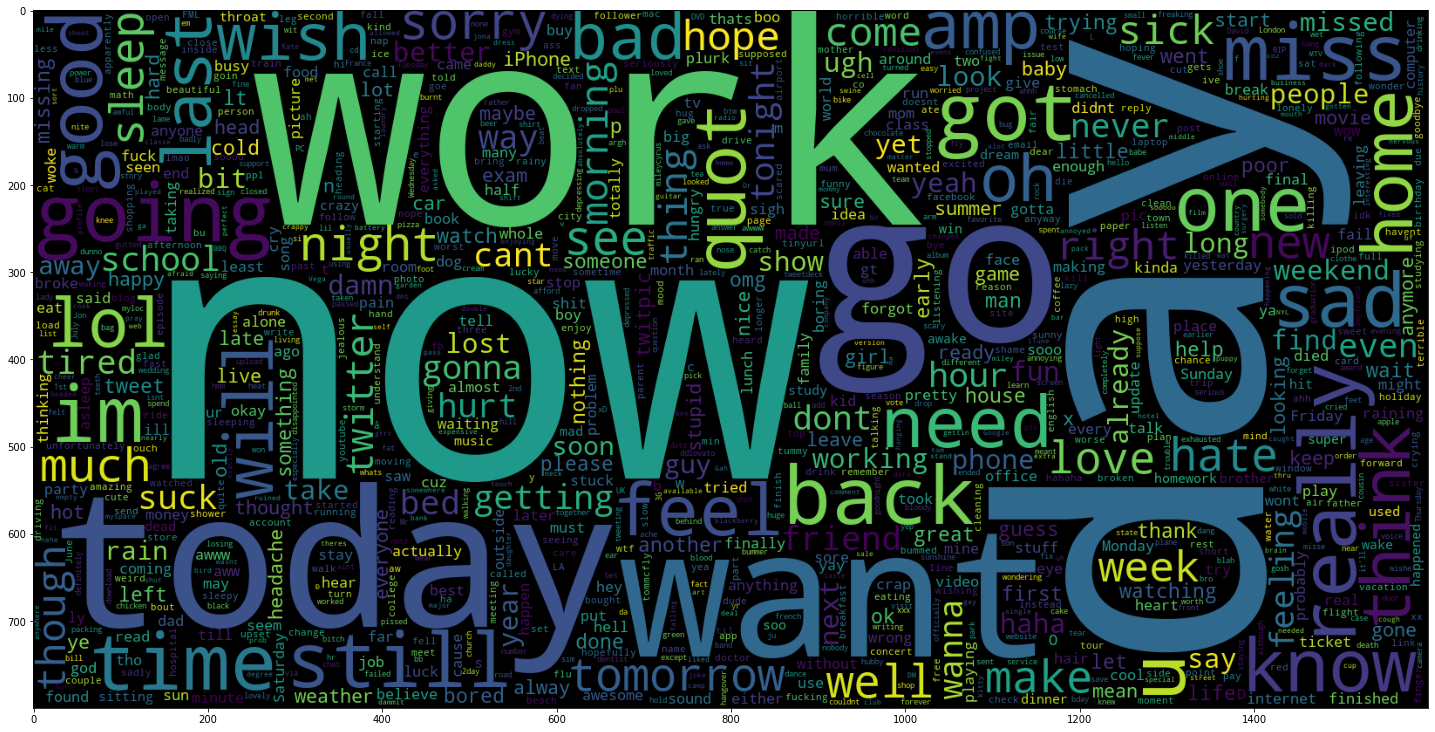

In [ ]:
# By :- Om Nai
# Twitter Sentiment Analysis

# Utilities
import re # Regular Expression
import numpy as np
import pandas as pd
# Plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk :- Natural language processing toolkit
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# Strings
import string

# Loading the kaggle data
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/sentiment140/training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(500)
# Here, 0 represents the -ve.
# Here, 4 represents the +ve.

# # Plotting the distribution for dataset.
# ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
# ax.set_xticklabels(['Negative','Positive'], rotation=0)
# # Storing data in lists.
# text, sentiment = list(df['text']), list(df['target'])

# Preprocessing.

# 5.1: Selecting the text and Target column for our further analysis
data=df[['text','target']]
# 5.2: Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)
data['target'] = data['target'].replace(4,1)
# 5.3: Print unique values of target variables
data['target'].unique()
# 5.4: Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
# 5.5: taking one fourth data so we can run on our machine easily
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
# 5.6: Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg])
# 5.7: Making statement text in lower case
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

# Stopwords list.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an', 'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do', 'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're', 's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was', 'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre", "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text. This is because no use with the +ve or -ve sentiments.
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

# Now, removing the the punctuations marks. As, if for the same reason stated above.
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

# Getting tokenization of tweet text
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

# Applying Stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

# Applying Lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

# Separating input feature and label
X=data.text
y=data.target

# 5.18: Plot a cloud of words for negative tweets
data_neg = data['text'][:800000]
plt.figure(figsize = (25,25))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)